<a href="https://colab.research.google.com/github/psgrigoletti/psgrigoletti/blob/master/Curso_de_Deep_Learning_parte_1_introdu%C3%A7%C3%A3o_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arquivo final: https://github.com/cassiass/keras-tensorflow/blob/master/Projeto_aula7.ipynb

In [ ]:
#!pip install tensorflow==2.1

# Imports

In [ ]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.python.ops.gen_nn_ops import softmax
import numpy as np
import matplotlib.pyplot as plt

# Criando o dataset

In [ ]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [ ]:
imagens_treino
identificacoes_treino
imagens_teste
identificacoes_teste

len(imagens_treino)
imagens_treino.shape

(60000, 28, 28)

In [ ]:
len(imagens_teste)
imagens_teste.shape

(10000, 28, 28)

Text(0.5, 1.0, '9')

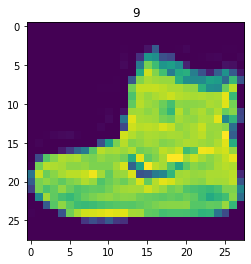

In [ ]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

# Criando as classificações

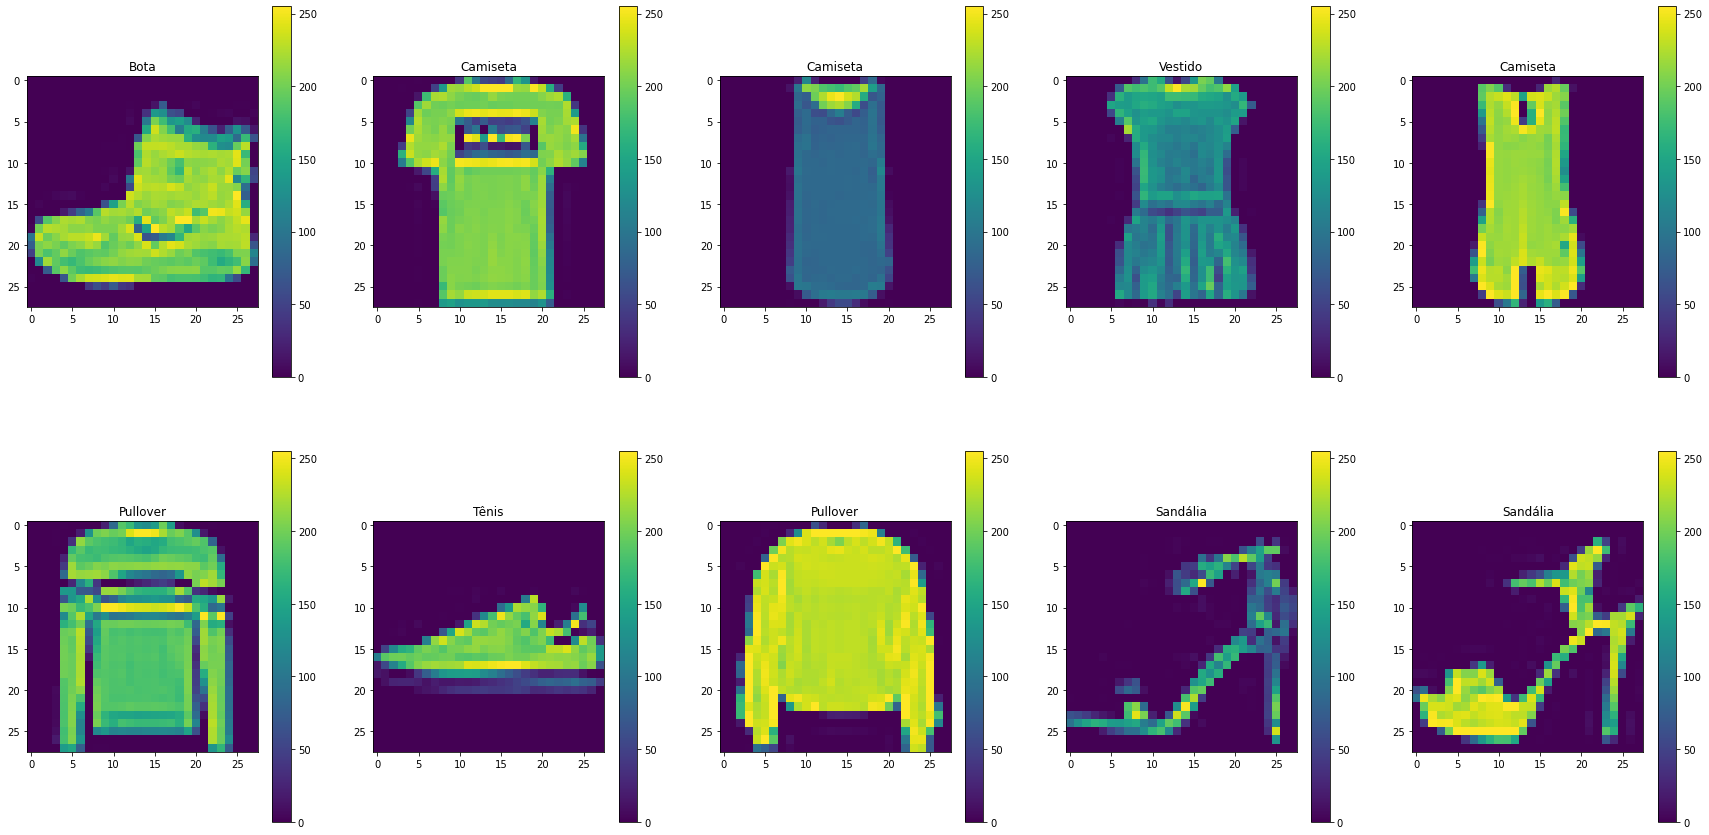

In [ ]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

f = plt.figure(figsize=(30,15))
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
  plt.colorbar()

In [ ]:
# normalização
imagens_treino = imagens_treino/float(255)
imagens_teste = imagens_teste/float(255)

In [ ]:
modelo = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)), 
                          keras.layers.Dense(256, activation = tensorflow.nn.relu),
                          keras.layers.Dropout(0.2),
                          #keras.layers.Dense(128, activation = tensorflow.nn.relu),
                          #keras.layers.Dense(64, activation = tensorflow.nn.relu),
                          keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)
historico

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5313 - accuracy: 0.8138 - val_loss: 0.4126 - val_accuracy: 0.8521
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3995 - accuracy: 0.8542 - val_loss: 0.3870 - val_accuracy: 0.8577
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3635 - accuracy: 0.8658 - val_loss: 0.3927 - val_accuracy: 0.8519
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3424 - accuracy: 0.8739 - val_loss: 0.3935 - val_accuracy: 0.8537
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3246 - accuracy: 0.8798 - val_loss: 0.3552 - val_accuracy: 0.8715


In [ ]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

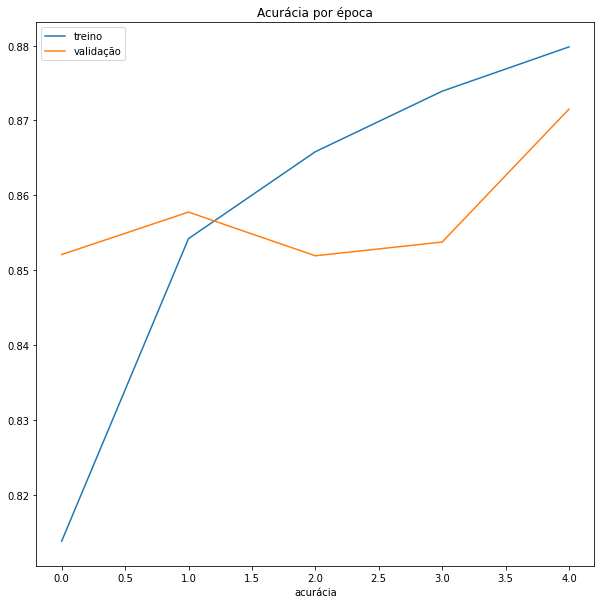

In [ ]:
f = plt.figure(figsize=(10,10))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Acurácia por época")
plt.xlabel("épocas")
plt.xlabel("acurácia")
plt.legend(["treino", "validação"])

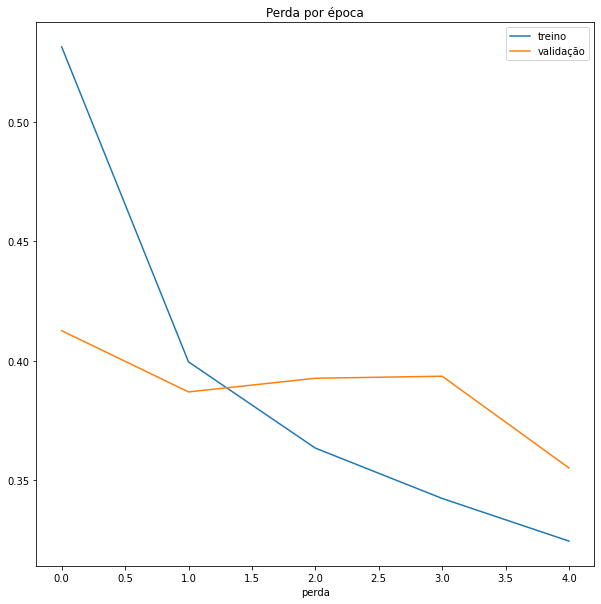

In [ ]:
f = plt.figure(figsize=(10,10))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Perda por época")
plt.xlabel("épocas")
plt.xlabel("perda")
plt.legend(["treino", "validação"])

In [ ]:
testes = modelo.predict(imagens_teste)
print("resultado teste: ", np.argmax(testes[0]))
print("número da imagem de teste: ", identificacoes_teste[0])

resultado teste:  9
número da imagem de teste:  9


In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print("Perda do teste: ", perda_teste)
print("Acurácia do teste: ", acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 60.6794 - accuracy: 0.8456
Perda do teste:  60.67943572998047
Acurácia do teste:  0.8456000089645386


In [ ]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print("resultado teste salvo: ", np.argmax(testes_modelo_salvo[0]))
print("número da imagem de teste salvo: ", identificacoes_teste[0])

resultado teste salvo:  9
número da imagem de teste salvo:  9
